In [40]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import polars.selectors as cs
from streamlit import columns

In [14]:
path = r"C:\Users\Zygim\Downloads\archive (11)\Consumption of alcoholic beverages 2017-2023 (Pivot table).csv"

In [17]:
df = pl.read_csv(path, encoding='latin1')

In [18]:
df

Region,Year,Type of alcoholic beverages,Consumption of alcoholic beverages (thousands of decaliters),Consumption of alcoholic beverages (in liters per capita),Consumption of alcoholic beverages (in liters of pure alcohol per capita)
str,i64,str,f64,f64,f64
"""Belgorod Oblast""",2017,"""Wine""",278.27,1.79,0.2
"""Bryansk Oblast""",2017,"""Wine""",368.22,3.02,0.33
"""Vladimir Oblast""",2017,"""Wine""",518.43,3.7,0.41
"""Voronezh Oblast""",2017,"""Wine""",628.77,2.68,0.3
"""Ivanovo Oblast""",2017,"""Wine""",339.89,3.42,0.38
…,…,…,…,…,…
"""Amur Oblast""",2023,"""Liqueurs""",84.21,1.11,0.45
"""Magadan Oblast""",2023,"""Liqueurs""",15.71,1.17,0.47
"""Sakhalin Oblast""",2023,"""Liqueurs""",68.98,1.5,0.6


In [29]:
dtypes = pl.DataFrame(df.schema)

In [33]:
dtypes

Region,Year,Type of alcoholic beverages,Consumption of alcoholic beverages (thousands of decaliters),Consumption of alcoholic beverages (in liters per capita),Consumption of alcoholic beverages (in liters of pure alcohol per capita)
object,object,object,object,object,object
String,Int64,String,Float64,Float64,Float64


In [50]:
df = df.with_columns(
    pl.col('Year').cast(pl.UInt16),
)

In [51]:
df['Type of alcoholic beverages'].unique()

Type of alcoholic beverages
cat
"""Wine"""
"""Beer"""
"""Vodka"""
"""Sparkling wine"""
"""Brandy"""
"""Ñider"""
"""Liqueurs"""


In [46]:
df.estimated_size('kb')

190.72265625

In [52]:
df

Region,Year,Type of alcoholic beverages,Consumption of alcoholic beverages (thousands of decaliters),Consumption of alcoholic beverages (in liters per capita),Consumption of alcoholic beverages (in liters of pure alcohol per capita)
str,u16,cat,f64,f64,f64
"""Belgorod Oblast""",2017,"""Wine""",278.27,1.79,0.2
"""Bryansk Oblast""",2017,"""Wine""",368.22,3.02,0.33
"""Vladimir Oblast""",2017,"""Wine""",518.43,3.7,0.41
"""Voronezh Oblast""",2017,"""Wine""",628.77,2.68,0.3
"""Ivanovo Oblast""",2017,"""Wine""",339.89,3.42,0.38
…,…,…,…,…,…
"""Amur Oblast""",2023,"""Liqueurs""",84.21,1.11,0.45
"""Magadan Oblast""",2023,"""Liqueurs""",15.71,1.17,0.47
"""Sakhalin Oblast""",2023,"""Liqueurs""",68.98,1.5,0.6


In [54]:
df['Year'].min(), df['Year'].max()

(2017, 2023)

In [55]:
df['Consumption of alcoholic beverages (thousands of decaliters)'].mean()

1415.2685834333736

In [56]:
df['Consumption of alcoholic beverages (in liters per capita)'].mean()

8.34952701080432

In [58]:
df['Consumption of alcoholic beverages (in liters of pure alcohol per capita)'].mean()

0.8041416566626651

In [70]:
pl.DataFrame({
    '(thousands of decaliters)': [df['Consumption of alcoholic beverages (thousands of decaliters)'].mean()],
    '(in liters per capita)': [df['Consumption of alcoholic beverages (in liters per capita)'].mean()],
    '(in liters of pure alcohol per capita)': [df['Consumption of alcoholic beverages (in liters of pure alcohol per capita)'].mean()]
}).unpivot(value_name='mean', variable_name='Consumption of alcoholic beverages')

Consumption of alcoholic beverages,mean
str,f64
"""(thousands of decaliters)""",1415.268583
"""(in liters per capita)""",8.349527
"""(in liters of pure alcohol per…",0.804142


In [71]:
df['Region'].unique()

Region
str
"""Ivanovo Oblast"""
"""Kemerovo Oblast"""
"""Yamalo-Nenets Autonomous Okrug"""
"""Kalmykia"""
"""Karachay-Cherkessia"""
…
"""Primorsky Krai"""
"""Perm Krai"""
"""Vladimir Oblast"""


In [75]:
df.null_count()

Region,Year,Type of alcoholic beverages,Consumption of alcoholic beverages (thousands of decaliters),Consumption of alcoholic beverages (in liters per capita),Consumption of alcoholic beverages (in liters of pure alcohol per capita)
u32,u32,u32,u32,u32,u32
0,0,0,0,0,0


In [82]:
correlation = df.select(cs.float()).corr()

<Axes: >

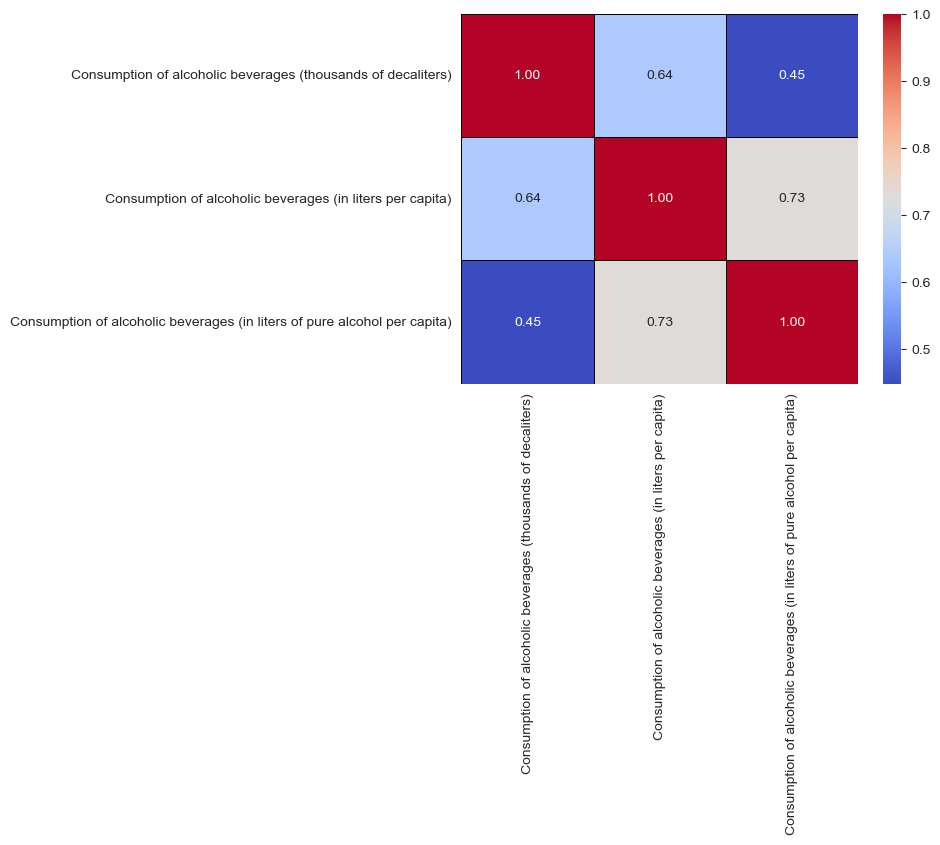

In [92]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='black',
            xticklabels=correlation.columns, yticklabels=correlation.columns)

In [103]:
df.group_by(
    pl.col('Year', 'Region')
).agg(
    pl.count('Region').alias('total')
)['total'].mean()

7.0

In [104]:
df.group_by(
    pl.col('Year', 'Region')
).agg(
    pl.count('Region').alias('total')
)

Year,Region,total
u16,str,u32
2018,"""Irkutsk Oblast""",7
2020,"""Primorsky Krai""",7
2023,"""Dagestan""",7
2019,"""Kalmykia""",7
2021,"""Orenburg Oblast""",7
…,…,…
2021,"""Irkutsk Oblast""",7
2017,"""Novgorod Oblast""",7
2019,"""Murmansk Oblast""",7


In [115]:
df.group_by(
    pl.col('Year')
).agg(
    pl.sum('Consumption of alcoholic beverages (thousands of decaliters)').alias('total'),
    pl.mean('Consumption of alcoholic beverages (in liters per capita)').alias('mean'),
    pl.std('Consumption of alcoholic beverages (in liters per capita)').alias('std'),
    pl.min('Consumption of alcoholic beverages (in liters per capita)').alias('min'),
    pl.max('Consumption of alcoholic beverages (in liters per capita)').alias('max'),
    pl.var('Consumption of alcoholic beverages (in liters per capita)').alias('var'),
).sort('total', descending=True)

Year,total,mean,std,min,max,var
u16,f64,f64,f64,f64,f64,f64
2023,880383.36,8.916269,17.742292,0.0,85.35,314.788936
2022,852922.57,8.489966,16.947606,0.0,74.29,287.221365
2021,850640.72,8.48721,17.174527,0.0,74.58,294.964381
2020,844307.22,8.54158,17.710766,0.0,92.91,313.671224
2017,827711.6,7.814655,15.915299,0.0,87.51,253.296758
2018,822561.93,8.143462,17.003932,0.0,116.63,289.133708
2019,816066.25,8.053546,16.513003,0.0,98.52,272.679278


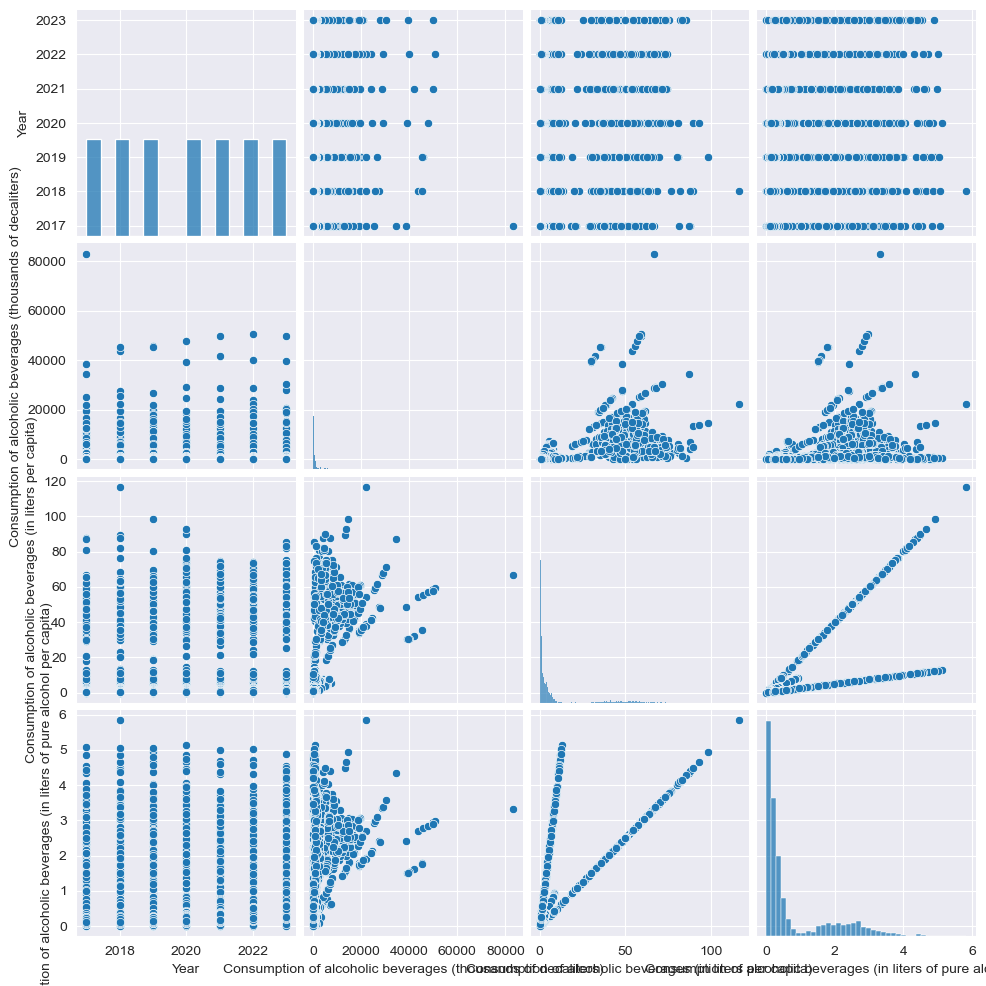

In [116]:
sns.pairplot(df.to_pandas())

In [121]:
# 3D scatter plot
fig = px.scatter_3d(df,
                    x='Year',
                    y='Region',
                    z='Consumption of alcoholic beverages (thousands of decaliters)',
                    color='Type of alcoholic beverages',
                    height=900,
                    width=1200)

fig.show()

In [124]:
df.group_by(
  'Region', 'Year'
).agg(
    pl.sum('Consumption of alcoholic beverages (thousands of decaliters)').alias('total')
).sort('total', descending=True)


Region,Year,total
str,u16,f64
"""Moscow""",2017,100912.28
"""Moscow Oblast""",2022,68252.56
"""Moscow Oblast""",2023,68023.59
"""Moscow Oblast""",2021,66387.77
"""Moscow Oblast""",2020,64481.61
…,…,…
"""Ingushetia""",2021,39.21
"""Ingushetia""",2020,36.55
"""Ingushetia""",2018,35.9


In [134]:
liters_per_capita = df.group_by(
    'Region', 'Year'
).agg(
    pl.sum('Consumption of alcoholic beverages (in liters per capita)').alias('total')
).sort('total', descending=True)


In [136]:
fig = px.scatter_3d(
    liters_per_capita,
    x='Year',
    y='Region',
    z='total',
    color='Region',
    height=900,
    width=1200
)

fig.show()

In [149]:
df.pivot(on='Type of alcoholic beverages', values='Consumption of alcoholic beverages (thousands of decaliters)')

Region,Year,Consumption of alcoholic beverages (in liters per capita),Consumption of alcoholic beverages (in liters of pure alcohol per capita),Wine,Beer,Vodka,Sparkling wine,Brandy,Ñider,Liqueurs
str,u16,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Belgorod Oblast""",2017,1.79,0.2,278.27,null,null,null,null,null,null
"""Bryansk Oblast""",2017,3.02,0.33,368.22,null,null,null,null,null,null
"""Vladimir Oblast""",2017,3.7,0.41,518.43,null,null,null,null,null,null
"""Voronezh Oblast""",2017,2.68,0.3,628.77,null,null,null,null,null,null
"""Ivanovo Oblast""",2017,3.42,0.38,339.89,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…
"""Amur Oblast""",2023,1.11,0.45,null,null,null,null,null,null,84.21
"""Magadan Oblast""",2023,1.17,0.47,null,null,null,null,null,null,15.71
"""Sakhalin Oblast""",2023,1.5,0.6,null,null,null,null,null,null,68.98
